In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind
from scipy.signal import savgol_filter
from glob import glob
import h5py
from matplotlib.ticker import FixedLocator

types = ['WT', 'Y132F', 'G131D']
cmap = plt.get_cmap('tab10')
colors = [cmap(0), cmap(7), [0.886,0.6745,0.2745]]

In [3]:
base_dir = '../run_sims/single_TCR/'
alt_dir = '../run_sims/alternate_parameters/'

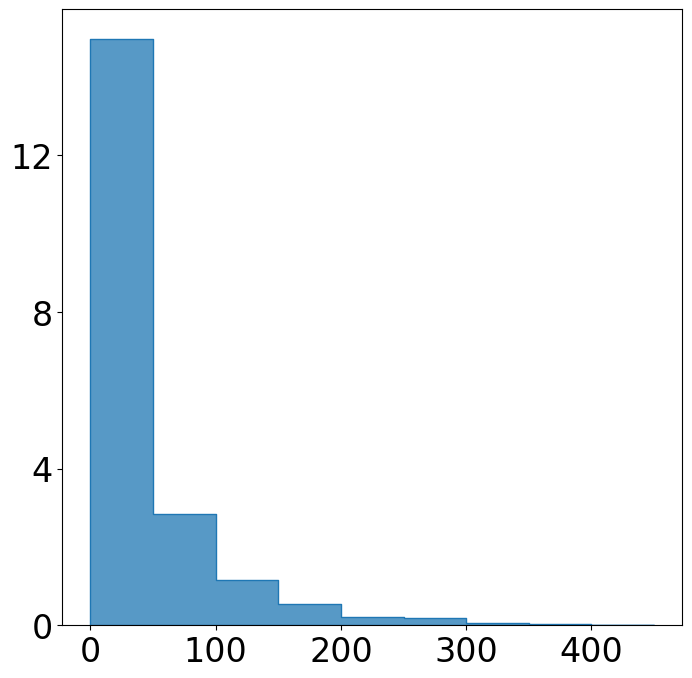

In [5]:
plt.figure(figsize=[8,8])
sizes_sim = pd.read_csv(f'{base_dir}single_TCR_largest_cluster.csv',index_col=0)
sizes_real = pd.read_csv('McAffee_data/2C_cluster_sizes.csv')

sns.histplot(sizes_sim['type0'],label='Sim',stat='density',element='step',bins=np.arange(0,500,50))

plt.xlabel('Cluster Size')

# plt.xlim([160,750])
plt.yticks([0,0.004,0.008,0.012],[0,4,8,12],fontsize=24)
plt.xticks(fontsize=24)

plt.xlabel('')
plt.ylabel('')

plt.savefig('new_max_num_clust_distr.png',dpi=1000,bbox_inches='tight')

## fig 3 with old params

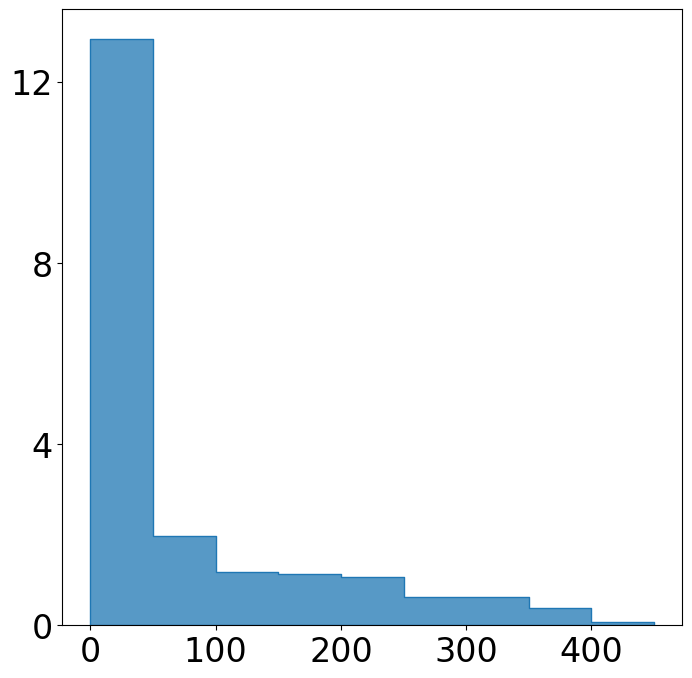

In [7]:
plt.figure(figsize=[8,8])
sizes_sim = pd.read_csv(f'{alt_dir}single_TCR_largest_cluster.csv',index_col=0)
sizes_real = pd.read_csv('McAffee_data/2C_cluster_sizes.csv')

sns.histplot(sizes_sim['type0'],label='Sim',stat='density',element='step',bins=np.arange(0,500,50))

plt.xlabel('Cluster Size')

# plt.xlim([160,750])
plt.xticks(fontsize=24)
plt.yticks([0,0.004,0.008,0.012],[0,4,8,12],fontsize=24)
plt.xlabel('')
plt.ylabel('')

plt.savefig('old_max_num_clust_distr.png',dpi=1000,bbox_inches='tight')

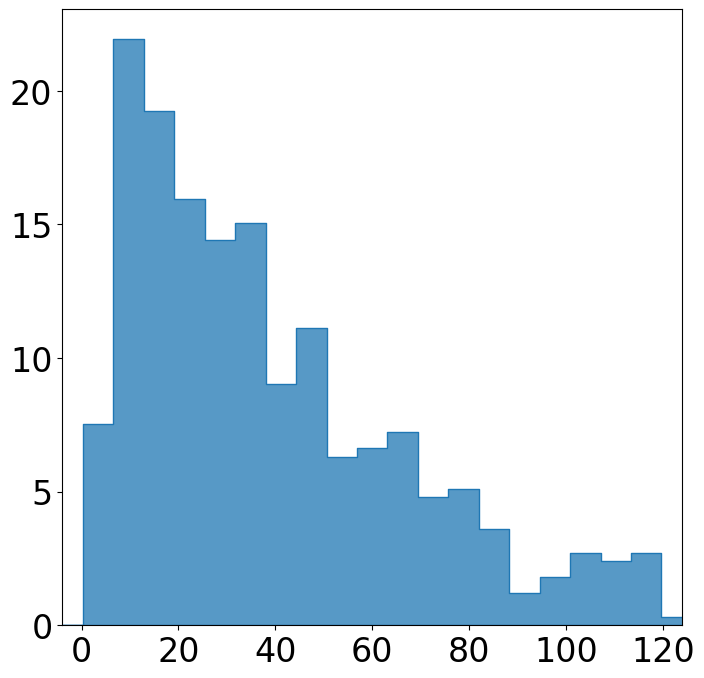

In [11]:
plt.figure(figsize=[8,8])
times_sim = pd.read_csv(f'{alt_dir}single_TCR_init_time.csv',index_col=0)

sns.histplot(times_sim['type0']/10,
             label='Sim',stat='density',element='step',bins=np.linspace(-6,126,22))

plt.xlabel('Delay Time')

plt.xlim([-4,124])
plt.xticks(fontsize=24)
plt.yticks([0,0.005,0.01,0.015,0.02],[0,5,10,15,20],fontsize=24)

plt.xlabel('')
plt.ylabel('')
    
plt.savefig(f'old_wt_init_time_distr.png',dpi=1000,bbox_inches='tight')

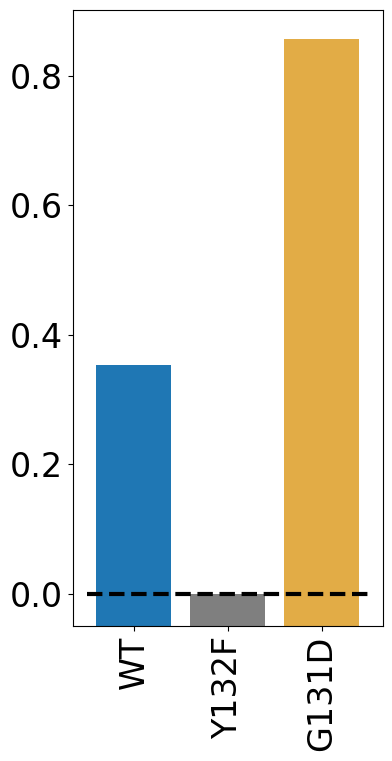

In [13]:
clust_sizes = pd.read_csv(f'{alt_dir}single_TCR_largest_cluster.csv',index_col=0)

bars = np.zeros([3])
errs = np.zeros([3])
for i,t in enumerate(types):
    bars[i] = np.mean(clust_sizes[f'type{i}']>50)
    
shift = 0.05
bars += shift

plt.figure(figsize=[4,8])
colors = [cmap(0), cmap(7), [0.886,0.6745,0.2745]]
types_extra = ['WT', 'Y132F', 'G131D']

for i,t in enumerate(types_extra):
    plt.bar(i,bars[i],capsize=0,color=colors[i],bottom=-shift,linewidth=3)
plt.plot([-0.5,2.5],[0,0],'k--',linewidth=3)

plt.xticks(range(3),types_extra,fontsize=24,rotation=90)
plt.yticks([0,0.2,0.4,0.6,0.8],fontsize=24)

plt.savefig(f'old_frac_clust_bar_plot.png',dpi=1000,bbox_inches='tight')

# shorter dt

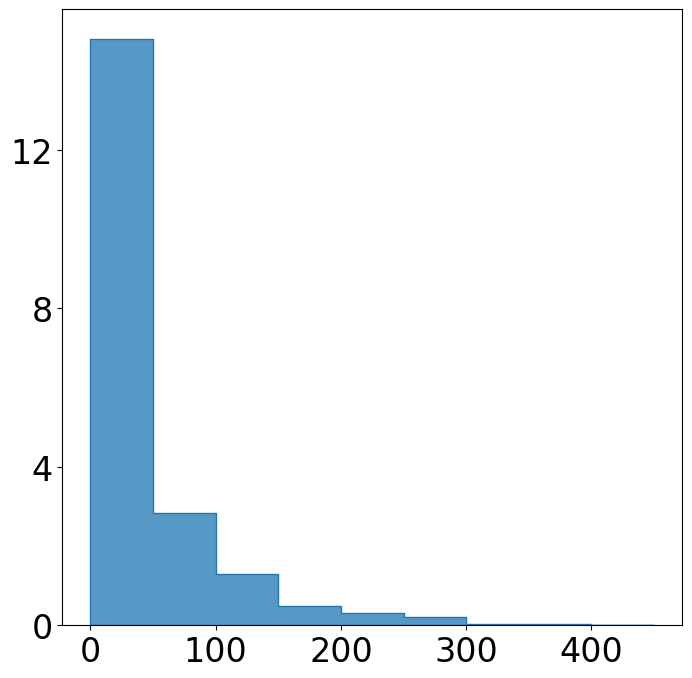

In [15]:
plt.figure(figsize=[8,8])
sizes_sim = pd.read_csv(f'{base_dir}/single_TCR_largest_cluster.csv',index_col=0)

sns.histplot(sizes_sim['type1'],label='Sim',stat='density',element='step',bins=np.arange(0,500,50))

plt.xlabel('Cluster Size')

# plt.xlim([160,750])
plt.xticks(fontsize=24)
plt.yticks([0,0.004,0.008,0.012],[0,4,8,12],fontsize=24)

plt.xlabel('')
plt.ylabel('')

plt.savefig('short_dt_max_num_clust_distr.png',dpi=1000,bbox_inches='tight')

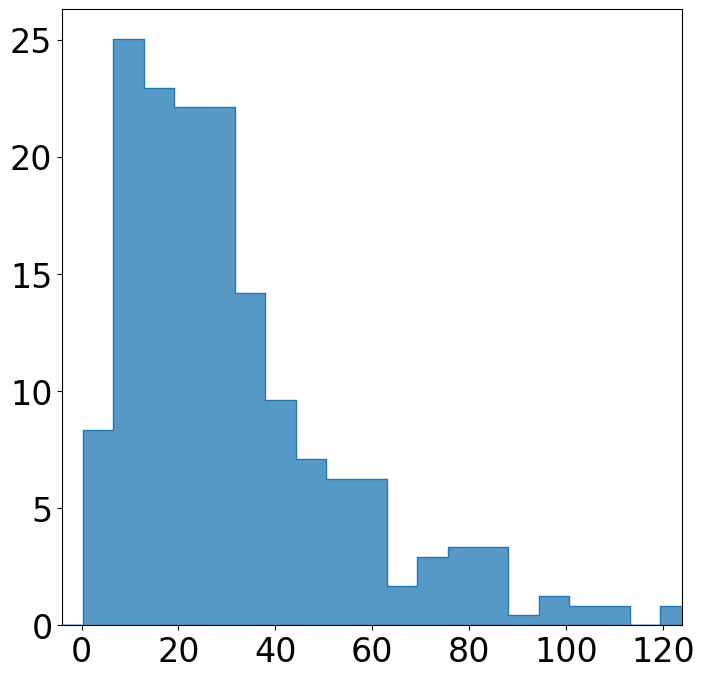

In [17]:
plt.figure(figsize=[8,8])
times_sim = pd.read_csv(f'{base_dir}single_TCR_init_time.csv',index_col=0)

sns.histplot(times_sim['type1']/10,
             label='Sim',stat='density',element='step',bins=np.linspace(-6,132,23))

plt.xlabel('Delay Time')

plt.xlim([-4,124])
plt.xticks(fontsize=24)
plt.yticks([0,0.005,0.01,0.015,0.02,0.025],[0,5,10,15,20,25],fontsize=24)

plt.xlabel('')
plt.ylabel('')
    
plt.savefig(f'short_dt_wt_init_time_distr.png',dpi=1000,bbox_inches='tight')

In [17]:
times_sim['type1'].max()

1198.0